# ДЗ 12. Feature importance
## Investigate feature importance for a tabular dataset of your choice (regression or classification problem):
- use at least 3 feature importance approaches on a dataset of your choice
- compare feature importance results
- make report

#### Для выполнения ДЗ 12 выполним необходимые импорты модулей.

In [177]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

#### Считываем табличный датасет с данными о сердечном заболевании

In [178]:
df = pd.read_csv('Heart_disease_cleveland_new.csv')
df.head()

,age,sex_gender,cp_chest_pain,trestbps_blood_pressure,chol_cholesterol,fbs_blood_sugar,restecg_Result_of_electrocardiogram,thalach_Maximum_heart_rate,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


##### Описание содержания табличного датасета
##### This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values. The detailed description of all these features are as follows:

1. Age: Patients Age in years (Numeric)
2. Sex: Gender (Male : 1; Female : 0) (Nominal)
3. cp: Type of chest pain experienced by patient. This term categorized into 4 category.
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
4. trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
5. chol: Serum cholesterol in mg/dl (Numeric)
6. fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
8. thalach: Maximum heart rate achieved (Numeric)
9. exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11. slope: ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)
12. ca: The number of major vessels (0–3)(nominal)
13. thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)
14. target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.


#### Вывод информации о датасете для проверки датасета на содержание значений Null

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  303 non-null    int64  
 1   sex_gender                           303 non-null    int64  
 2   cp_chest_pain                        303 non-null    int64  
 3   trestbps_blood_pressure              303 non-null    int64  
 4   chol_cholesterol                     303 non-null    int64  
 5   fbs_blood_sugar                      303 non-null    int64  
 6   restecg_Result_of_electrocardiogram  303 non-null    int64  
 7   thalach_Maximum_heart_rate           303 non-null    int64  
 8   exang                                303 non-null    int64  
 9   oldpeak                              303 non-null    float64
 10  slope                                303 non-null    int64  
 11  ca                              

#### Как можно наблюдать, все значения числовые, пропущенных значений нет.
#### Также выполним разделение обучения/тестирования и выполним масштабирование с помощью класса StandartScaler.


In [180]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

std_s = StandardScaler()
X_train_scaled = std_s.fit_transform(X_train)
X_test_scaled = std_s.transform(X_test)
print(X_train_scaled.shape, y_train.shape)

(227, 13) (227,)


Формируем список этикеток для графиков, для наглядного восприятия информации

In [181]:
df_labels = df.drop('target', axis=1).columns.values.tolist()
df_labels = [f'[Feature: {df_labels.index(el)}] {el}' for el in df_labels]
df_labels

['[Feature: 0] age',
 '[Feature: 1] sex_gender',
 '[Feature: 2] cp_chest_pain',
 '[Feature: 3] trestbps_blood_pressure',
 '[Feature: 4] chol_cholesterol',
 '[Feature: 5] fbs_blood_sugar',
 '[Feature: 6] restecg_Result_of_electrocardiogram',
 '[Feature: 7] thalach_Maximum_heart_rate',
 '[Feature: 8] exang',
 '[Feature: 9] oldpeak',
 '[Feature: 10] slope',
 '[Feature: 11] ca',
 '[Feature: 12] thal']

#### **Методы выбора признаков (фич) предназначены для уменьшения количества входных переменных до тех, которые считаются наиболее полезными для модели, чтобы предсказать целевую переменную. Как известно, некоторые задачи прогнозного моделирования имеют большое количество переменных, что может замедлить разработку и обучение моделей и потребовать большого объема системной памяти. Кроме того, производительность некоторых моделей может снизиться при включении входных переменных, не относящихся к целевой переменной. Согласно заданию применим методы контролируемого выбора признаков, которые используют целевую переменную и сравненим их эффективность выбора признаков.**


#### **Модель LogisticRegression позволяет получить свойство coeff_, содержащее коэффициенты, найденные для каждой входной переменной. Эти коэффициенты можно использовать как основу для грубой оценки важности признаков. Положительные оценки указывают на признак, который предсказывает класс 1, тогда как отрицательные оценки указывают на признак, который предсказывает класс 0.**

Feature: 0, Score: 0.00760
Feature: 1, Score: 0.70402
Feature: 2, Score: 0.46193
Feature: 3, Score: 0.35999
Feature: 4, Score: 0.32795
Feature: 5, Score: -0.11996
Feature: 6, Score: 0.14339
Feature: 7, Score: -0.38603
Feature: 8, Score: 0.45406
Feature: 9, Score: 0.27850
Feature: 10, Score: 0.32682
Feature: 11, Score: 1.31567
Feature: 12, Score: 0.52183


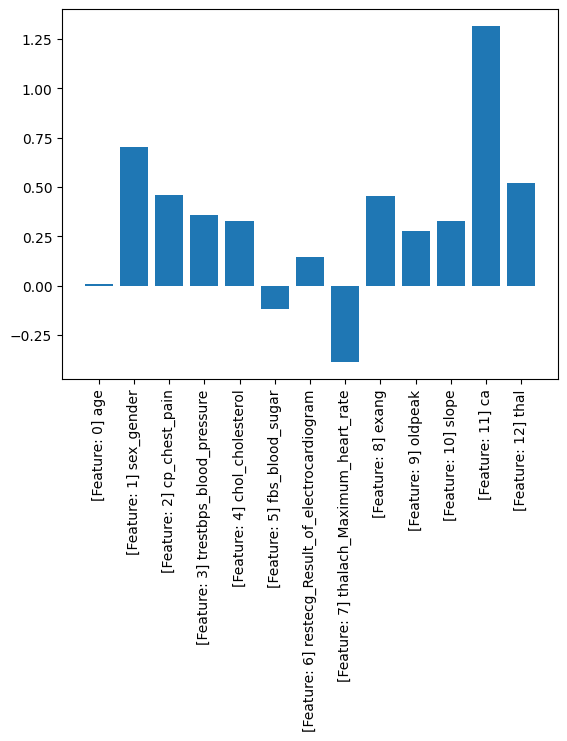

In [182]:
# logistic regression for feature importance

# define the model
log_r_clf = LogisticRegression()
# fit the model
log_r_clf.fit(X_train_scaled, y_train)
# get importance
importance = log_r_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(np.arange(0, 13), labels=df_labels, rotation='vertical')
pyplot.show()

#### **По этим результатам сложно определить четкую закономерность важных и неважных признаков, но выделяются из общего ряда признаки 2, 11 и 12 для класса 1.**

#### **Модель DecisionTreeClassifier позволяет получить свойство feature_importances, найденные для каждой входной переменной. Классификации выполняется путем построения дерева решений. Каждый узел в дереве задает проверку атрибута, каждая ветвь, идущая от этого узла, соответствует одному из возможных значений этого атрибута.**

Feature: 0, Score: 0.13027
Feature: 1, Score: 0.06203
Feature: 2, Score: 0.25247
Feature: 3, Score: 0.04264
Feature: 4, Score: 0.06644
Feature: 5, Score: 0.01681
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.05756
Feature: 8, Score: 0.02522
Feature: 9, Score: 0.10411
Feature: 10, Score: 0.01349
Feature: 11, Score: 0.13194
Feature: 12, Score: 0.09702


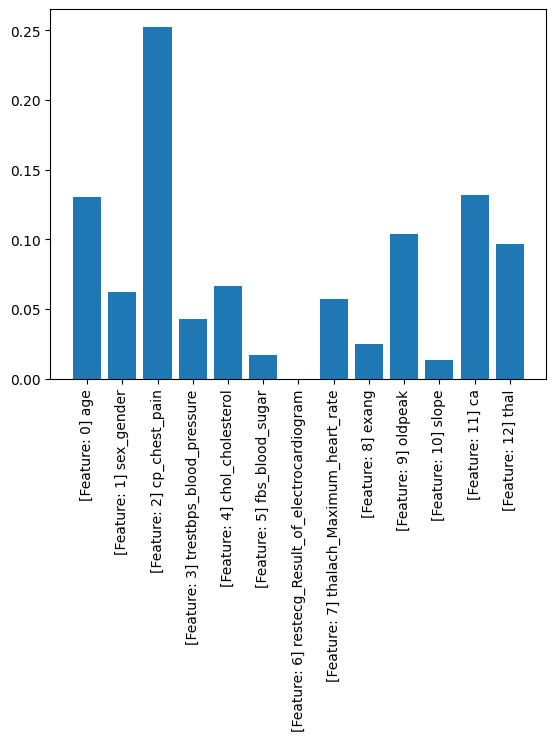

In [183]:
# decision tree for feature importance on a classification problem

# define the model
dt_clf = DecisionTreeClassifier()
# fit the model
# model.fit(X, y)
dt_clf.fit(X_train_scaled, y_train)
# get importance
importance = dt_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(np.arange(0, 13), labels=df_labels, rotation='vertical')
pyplot.show()

#### **Согласно результатам можно выделить 5 из 13 признаков важны для предсказания: 0, 2, 9, 11 и 12.**

#### **Модель RandomForestClassifier также позволяет получить свойство feature_importances, найденные для каждой входной переменной. Классификации выполняется путем построения дерева решений. Дерево решений формирует узлы, содержащие большое количество образцов из набора исходных данных, принадлежащих к одному классу. Алгоритм старается обнаружить параметры со сходными значениями.**

Feature: 0, Score: 0.08992
Feature: 1, Score: 0.04418
Feature: 2, Score: 0.12715
Feature: 3, Score: 0.08014
Feature: 4, Score: 0.08325
Feature: 5, Score: 0.00788
Feature: 6, Score: 0.01832
Feature: 7, Score: 0.11948
Feature: 8, Score: 0.05487
Feature: 9, Score: 0.10748
Feature: 10, Score: 0.03893
Feature: 11, Score: 0.11888
Feature: 12, Score: 0.10951


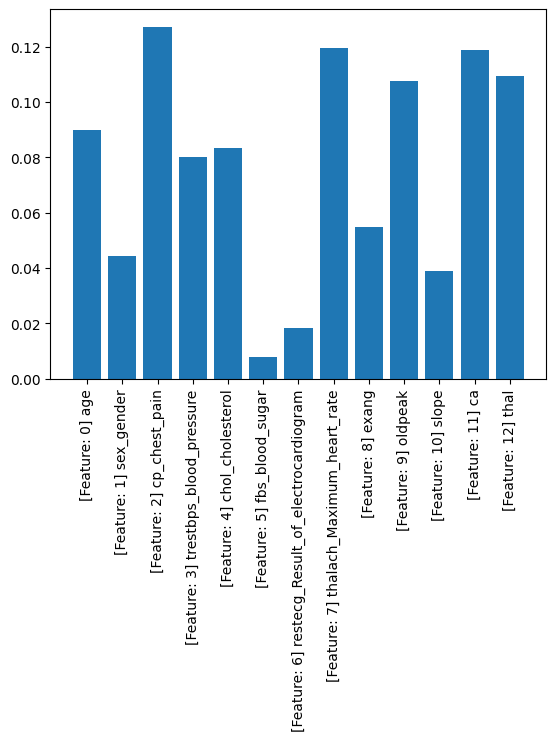

In [184]:
# random forest for feature importance on a classification problem

# define the model
rf_clf = RandomForestClassifier()
# fit the model
rf_clf.fit(X_train_scaled, y_train)
# get importance
importance = rf_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(np.arange(0, 13), labels=df_labels, rotation='vertical')
pyplot.show()

#### **По результатам можно выделить 5 из 13 признаков важны для предсказания: 2, 7, 9, 11 и 12.**

#### **Модель XGBClassifier также позволяет получить свойство feature_importances, найденные для каждой входной переменной. Модель "экстремального повышения градиента" строит предсказание в виде ансамбля слабых предсказывающих моделей, которыми в основном являются деревья решений. Из нескольких слабых моделей в итоге мы собираем одну, но уже эффективную.**

Feature: 0, Score: 0.03554
Feature: 1, Score: 0.05673
Feature: 2, Score: 0.19811
Feature: 3, Score: 0.03681
Feature: 4, Score: 0.02827
Feature: 5, Score: 0.03097
Feature: 6, Score: 0.02676
Feature: 7, Score: 0.03075
Feature: 8, Score: 0.07098
Feature: 9, Score: 0.05076
Feature: 10, Score: 0.03482
Feature: 11, Score: 0.11697
Feature: 12, Score: 0.28254


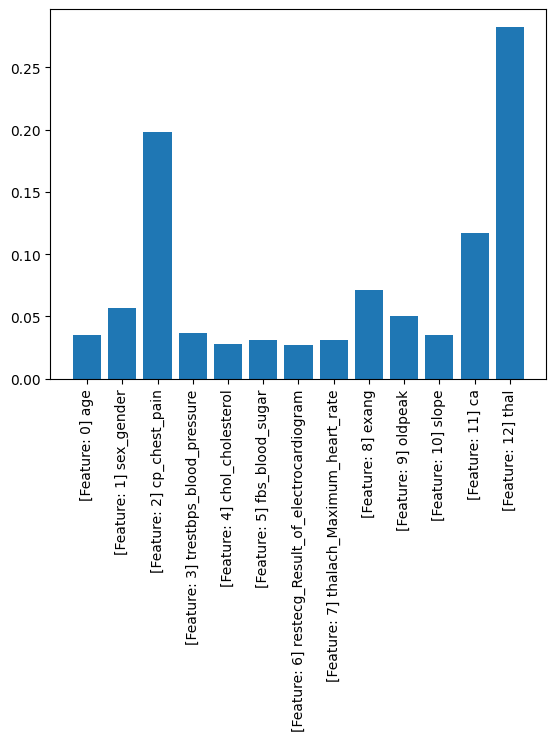

In [185]:
# xgboost for feature importance on a classification problem

# define the model
xgb_clf = XGBClassifier()
# fit the model
xgb_clf.fit(X, y)
# get importance
importance = xgb_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(np.arange(0, 13), labels=df_labels, rotation='vertical')
pyplot.show()

#### **По результатам можно выделить 3 из 13 признаков важны для предсказания: 2, 11 и 12.**

#### После проведения эксперимента на четырех моделях (LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier) стало возможным выделить общие признаки важности для предсказаний - 2, 11 и 12 (соответственно боли в груди, количество крупных сосудов, заболевание крови талассимией), что, в свою очередь, позволяет упростить модель, ускорить процесс моделирования уменьшением размерности и повысить производительность модели.

#### Построим ансамбль моделей классификации для повышению итогового качества предсказаний.
**В ансамбле рекомендуется применять не четное количество входящих в него моделей, значит, по результату показателя точности для каждой из четырех использованых моделей, модель с минимальным показателем точности будет исключена из ансамля. В нашем случае будет исключена модель DecisionTreeClassifier**

**В ансамбле с значением voting='hard' итоговый ответ объединенного классификатора будет соответствовать «мнению» большинства входящих в него моделей.**

In [186]:
log_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('xgb', xgb_clf)],  # excluded: DecisionTreeClassifier (acc: 66%)
    voting='hard')
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...))])

In [187]:
for clf in (log_clf, dt_clf, rf_clf, xgb_clf, voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.5f} [{clf.__class__.__name__}]')

Accuracy: 0.88158 [LogisticRegression]
Accuracy: 0.65789 [DecisionTreeClassifier]
Accuracy: 0.85526 [RandomForestClassifier]
Accuracy: 0.80263 [XGBClassifier]
Accuracy: 0.86842 [VotingClassifier]


**В ансамбле с значением voting='soft' итоговый ответ объединенного классификатора будет соответствовать сумме вероятностей "мнений" входящих в него моделей.**

In [188]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('xgb', xgb_clf)],  # excluded: DecisionTreeClassifier (acc: 66%)
    voting='soft')
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...))],
                 voting='soft')

In [189]:
for clf in (log_clf, dt_clf, rf_clf, xgb_clf, voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.5f} [{clf.__class__.__name__}]')

Accuracy: 0.88158 [LogisticRegression]
Accuracy: 0.65789 [DecisionTreeClassifier]
Accuracy: 0.85526 [RandomForestClassifier]
Accuracy: 0.80263 [XGBClassifier]
Accuracy: 0.85526 [VotingClassifier]


#### Как видно, модели проявили себя несколько по-разному на обучающей выборке. При этом итоговое значение, по метрике accuracy, ансамбля hard voting и soft voting не отличаются в нашем случае, также accuracy не обязательно должно превышать лучшего значения из входящих в него моделей, т.к. ансамбль является более стабильной моделью, способной показать схожий результат на тестовой выборке, что позволит снизить риск переобучения, подгонки под обучающую выборку и других сопутствующих обучению классификаторов проблем.